## Reducing noise with VAE

In [31]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append('src/')

import vae
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate dataset

In [32]:
def generate_data(n,p):
    f = np.sin
    
    x = np.linspace(0,2*np.pi,p)
    phase = 2*np.pi*np.random.random(size = (n,1))
    
    return f(x + phase),phase

In [33]:
n = 10000
p = 100

data, phase = generate_data(n,p)
noise_data = data + np.random.normal(loc = 0.0, scale = 1.0, size = (n,p))

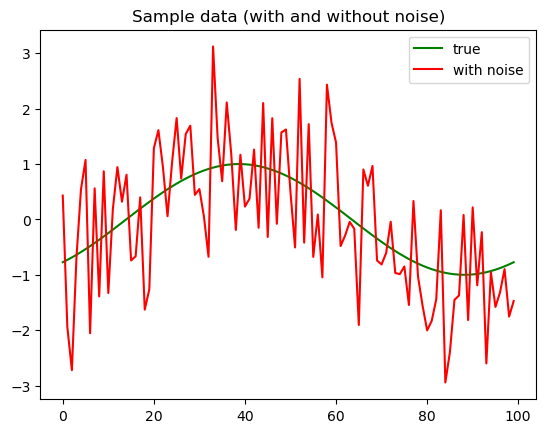

In [34]:
index = np.random.randint(0,len(data))

plt.title('Sample data (with and without noise)')
plt.plot(data[index], label = 'true', c = 'g')
plt.plot(noise_data[index], label = 'with noise', c = 'r')
plt.legend()
plt.show()

## Train VAE

In [53]:
input_dim = noise_data.shape[1]

model = vae.VAE(input_dim = input_dim)
model.compile(optimizer = 'adam')
model.fit(noise_data, batch_size = 32, epochs = 10, verbose = 0, shuffle = True)

## Display latent representation of true data

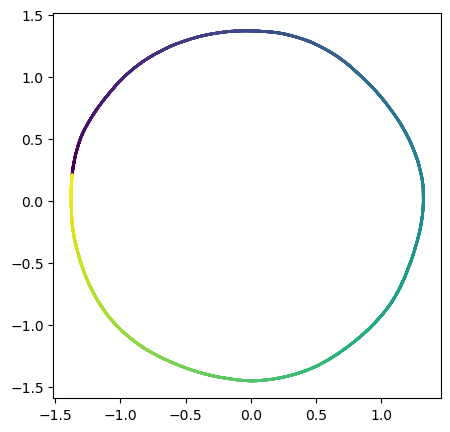

In [54]:
plt.figure(figsize = (5,5))
encoded_data = model.encoder.predict(data)[0]
plt.scatter(encoded_data[:,0],encoded_data[:,1],c = phase, s = 1)
plt.show()

## Display latent representation of data with noise

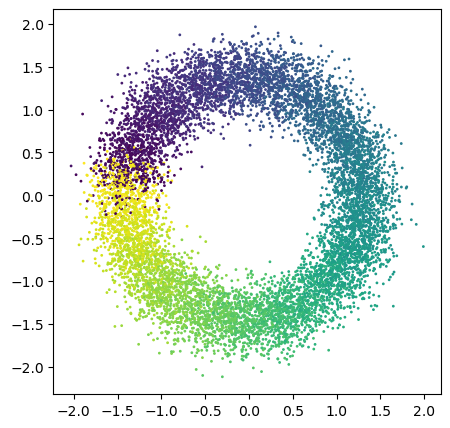

In [61]:
plt.figure(figsize = (5,5))
encoded_data = model.encoder.predict(noise_data)[0]
plt.scatter(encoded_data[:,0],encoded_data[:,1],c = phase, s = 1)
plt.show()

## Use VAE to denoise the data

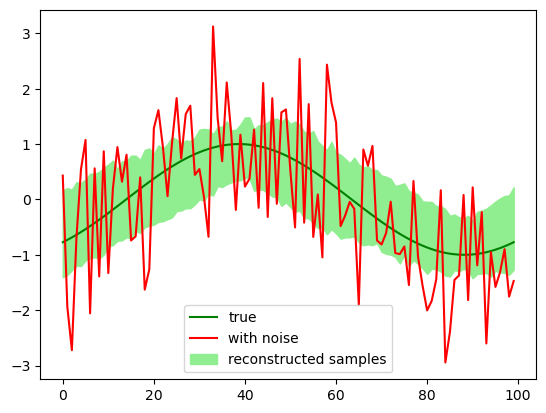

In [62]:
plt.plot(data[index],label = 'true', c = 'g')
plt.plot(noise_data[index], label = 'with noise', c = 'r')

n_sample = 100

z = model.encoder.predict(data[index] + np.zeros((n_sample,1)))[2]
reconstructions = np.sort(model.decoder.predict(z),axis = 0)

plt.fill_between(range(len(data[index])),reconstructions[0],reconstructions[-1], color = 'lightgreen', label = 'reconstructed samples')
plt.legend()
plt.show()